In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
%matplotlib inline

In [6]:
start_df = pd.read_csv('loan.csv',low_memory=False)

In [9]:
start_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
start_df.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [16]:
start_df.memory_usage().sum()/1024**2

500.99224853515625

In [17]:
start_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [27]:
df_description = pd.read_excel("LCDataDictionary.xlsx").dropna()

In [28]:
df_description.head(2)

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan...
1,annual_inc,The self-reported annual income provided by th...


In [29]:
df_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


In [31]:
start_df.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [35]:
100 * start_df.isnull().sum()/len(start_df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.799326
emp_length                      5.051393
home_ownership                  0.000000
annual_inc                      0.000451
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
url                             0.000000
desc                           85.797726
purpose                         0.000000
title                           0.017129
zip_code                        0.000000
addr_state                      0.000000
dti             

In [36]:
def null_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis = 1)
    mis_val_ren_columns = mis_val_table.rename(columns={0 : "Missing Values", 1 : "% of Missing Values"})
    mis_val_ren_columns = mis_val_ren_columns[mis_val_ren_columns.iloc[:,1] != 0].sort_values('% of Missing Values',ascending=False).round(1)
    print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_ren_columns.shape[0]) +
              " columns that have missing values.")
    return mis_val_ren_columns

In [37]:
miss_values = null_values(start_df)
miss_values.head(20)

Dataframe has 74 columns.
There are 40 columns that have missing values.


,Missing Values,% of Missing Values
dti_joint,886870,99.9
annual_inc_joint,886868,99.9
verification_status_joint,886868,99.9
il_util,868762,97.9
mths_since_rcnt_il,866569,97.7
total_cu_tl,866007,97.6
inq_fi,866007,97.6
all_util,866007,97.6
max_bal_bc,866007,97.6
open_rv_24m,866007,97.6


In [38]:
start_df['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [39]:
start_df['loan_status']=[1 if i=='Default' else 0 for i in start_df['loan_status']]

In [40]:
start_df['loan_status'].value_counts()

0    886160
1      1219
Name: loan_status, dtype: int64

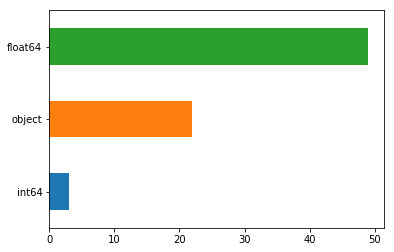

In [45]:
start_df.dtypes.value_counts().sort_values().plot(kind='barh')


### After looking at the above distribution we can say that there are quite a number of columns that have object as the datatype which will impose problem while modelling

In [58]:
start_df.select_dtypes('object').nunique()

term                              2
grade                             7
sub_grade                        35
emp_title                    299271
emp_length                       11
home_ownership                    6
verification_status               3
issue_d                         103
pymnt_plan                        2
url                          887379
desc                         124469
purpose                          14
title                         63144
zip_code                        935
addr_state                       51
earliest_cr_line                697
initial_list_status               2
last_pymnt_d                     98
next_pymnt_d                    100
last_credit_pull_d              103
application_type                  2
verification_status_joint         3
dtype: int64

#### Droping url desc title emp_title

In [60]:
start_df.drop(['url','emp_title','desc','title'],inplace=True,axis=1)

In [61]:
start_df['emp_length'].isnull().sum()

44825

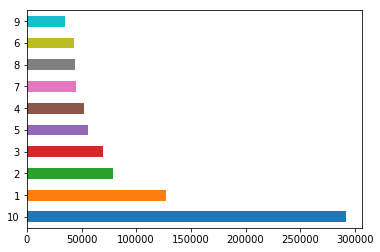

In [66]:
start_df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
start_df['emp_length'].value_counts().plot(kind='barh')

In [72]:
start_df['emp_length'].isnull().sum()

44825

In [74]:
start_df['emp_length'].fillna(value=0,inplace=True)

In [75]:
start_df['emp_length'].isnull().sum()

0

In [76]:
#Storing TRUE if the count of that column is less than 70%
temp = [i for i in start_df.count()<887379 *0.30] 

In [78]:
temp

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True]

In [81]:
start_df.drop(start_df.columns[temp],axis=1,inplace=True)

In [83]:
start_df.drop(['id','member_id','zip_code'],axis=1,inplace=True)

In [85]:
#Converting the field to datetime and extracting the year and storing it in Integer format
start_df['issue_d']= pd.to_datetime(start_df['issue_d']).apply(lambda x: int(x.strftime('%Y')))

In [86]:
start_df['last_pymnt_d']= pd.to_datetime(start_df['last_pymnt_d'].fillna('2016-01-01')).apply(lambda x: int(x.strftime('%m')))
start_df['last_credit_pull_d']= pd.to_datetime(start_df['last_credit_pull_d'].fillna("2016-01-01")).apply(lambda x: int(x.strftime('%m')))
start_df['earliest_cr_line']= pd.to_datetime(start_df['earliest_cr_line'].fillna('2001-08-01')).apply(lambda x: int(x.strftime('%m')))
start_df['next_pymnt_d'] = pd.to_datetime(start_df['next_pymnt_d'].fillna(value = '2016-02-01')).apply(lambda x:int(x.strftime("%Y")))

In [91]:
start_df['mths_since_last_delinq'] = start_df['mths_since_last_delinq'].fillna(start_df['mths_since_last_delinq'].median())

In [93]:
start_df.dropna(inplace=True)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [95]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(start_df.drop('loan_status',axis=1),start_df['loan_status'],test_size=0.05,random_state=101)

In [119]:
from imblearn.over_sampling import SMOTE

In [120]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
673713,12000.0,12000.0,11925.0,months,16.55,425.16,D,D2,10,MORTGAGE,...,425.16,2016,1,0.0,1.0,INDIVIDUAL,0.0,0.0,168502.0,26100.0
369245,18000.0,18000.0,18000.0,months,12.99,606.41,C,C1,10,MORTGAGE,...,606.41,2016,1,0.0,1.0,INDIVIDUAL,0.0,917.0,233387.0,31500.0
886139,7650.0,7650.0,7650.0,months,12.99,257.73,C,C2,10,RENT,...,257.73,2016,1,0.0,1.0,INDIVIDUAL,0.0,75.0,16154.0,20500.0
270189,4800.0,4800.0,4800.0,months,7.12,148.48,A,A3,2,OWN,...,148.48,2016,1,0.0,1.0,INDIVIDUAL,0.0,0.0,48278.0,51100.0
260919,30000.0,30000.0,30000.0,months,12.39,673.27,C,C1,9,MORTGAGE,...,673.27,2016,1,0.0,1.0,INDIVIDUAL,0.0,0.0,352813.0,69000.0


In [104]:
from sklearn import preprocessing
count = 0

for col in X_train:
    if X_train[col].dtype == 'object':
        if len(list(X_train[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            X_train[col] = le.fit_transform(X_train[col])
            count += 1
            print (col)

print('%d columns were label encoded.' % count)

term
pymnt_plan
initial_list_status
application_type
4 columns were label encoded.


In [110]:
for col in X_test:
    if X_test[col].dtype == 'object':
        if len(list(X_test[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            X_test[col] = le.fit_transform(X_test[col])
            count += 1
            print (col)

print('%d columns were label encoded.' % count)

term
pymnt_plan
initial_list_status
application_type
8 columns were label encoded.


In [112]:
X_test.select_dtypes('object').columns

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'addr_state'],
      dtype='object')

In [121]:
start_df.select_dtypes('object')

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
42535,months,B,B2,10,OWN,Verified,n,debt_consolidation,MI,w,INDIVIDUAL
42536,months,C,C1,1,RENT,Not Verified,n,debt_consolidation,CA,f,INDIVIDUAL
42537,months,A,A2,10,MORTGAGE,Not Verified,n,debt_consolidation,CT,w,INDIVIDUAL
42538,months,B,B5,10,RENT,Source Verified,n,debt_consolidation,NM,w,INDIVIDUAL
42539,months,A,A5,2,MORTGAGE,Not Verified,n,debt_consolidation,FL,w,INDIVIDUAL
42540,months,B,B3,10,MORTGAGE,Source Verified,n,debt_consolidation,CO,f,INDIVIDUAL
42541,months,B,B4,4,RENT,Not Verified,n,debt_consolidation,NC,f,INDIVIDUAL
42542,months,C,C5,3,RENT,Not Verified,n,debt_consolidation,CA,w,INDIVIDUAL
42543,months,B,B1,7,MORTGAGE,Not Verified,n,debt_consolidation,MA,f,INDIVIDUAL
42544,months,B,B4,10,RENT,Verified,n,debt_consolidation,FL,f,INDIVIDUAL


In [114]:
X_test['term'].replace(to_replace='[^0-9]', value='', inplace=True, regex=True)
X_train['term'].replace(to_replace='[^0-9]', value='', inplace=True, regex=True)



In [122]:
start_df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'addr_state',
       'initial_list_status', 'application_type'],
      dtype='object')

In [123]:
X_test.drop(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'addr_state',
       'initial_list_status', 'application_type'],inplace=True,axis=1)
X_train.drop(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'addr_state',
       'initial_list_status', 'application_type'],inplace=True,axis=1)

In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\Users\vicky\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vicky\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\vicky\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [125]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_r, y_train_r = sm.fit_sample(X_train, y_train)

In [126]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=40, random_state=21)
clf_rf.fit(x_train_r, y_train_r)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
            oob_score=False, random_state=21, verbose=0, warm_start=False)

In [127]:
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train,clf_rf.predict(X_test))))

ValueError: Found input variables with inconsistent numbers of samples: [775885, 40837]